In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
student_df = pd.read_csv('/content/drive/MyDrive/Workshop_5_csv/student.csv')


In [ ]:
student_df.head()


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [ ]:
student_df.tail()


,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [ ]:
student_df.describe()


,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
X_raw = student_df.drop(columns=['Writing']).values
Y_raw = student_df['Writing'].values


In [ ]:
X = X_raw
Y = Y_raw
W = np.zeros(X.shape[1])
print('Initial W:', W)
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)
print('Shape of W:', W.shape)


Initial W: [0. 0.]
Shape of X: (1000, 2)
Shape of Y: (1000,)
Shape of W: (2,)


In [ ]:
def spilt_data_train_test(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = (X[train_indices], X[test_indices])
    y_train, y_test = (y[train_indices], y[test_indices])
    return (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = spilt_data_train_test(X, Y, test_size=0.3, random_seed=42)
print(f'Feature Training set: \n]n{X_train}\n')
print(f'Feature Testing set: \n\n{X_test}')
print('\nTraining set size:', X_train.shape)
print('\nTest set size:', X_test.shape)


Feature Training set: 
]n[[43 43]
 [79 88]
 [74 71]
 ...
 [64 76]
 [66 75]
 [68 76]]

Feature Testing set: 

[[ 63  69]
 [ 42  37]
 [ 69  62]
 [ 69  59]
 [100  92]
 [ 60  70]
 [ 90  99]
 [ 38  50]
 [ 68  60]
 [ 94  79]
 [ 79  87]
 [ 62  67]
 [ 72  69]
 [ 42  58]
 [ 68  59]
 [ 65  56]
 [ 71  71]
 [ 51  69]
 [ 77  89]
 [ 70  65]
 [ 71  82]
 [ 59  74]
 [ 72  66]
 [ 84  74]
 [ 65  57]
 [ 75  88]
 [ 51  53]
 [ 65  66]
 [ 83  85]
 [ 51  44]
 [ 93  97]
 [ 90  84]
 [ 40  32]
 [ 54  55]
 [ 88  87]
 [ 63  76]
 [ 95  89]
 [ 77  85]
 [ 63  75]
 [ 70  81]
 [ 90  76]
 [ 49  62]
 [ 51  61]
 [ 62  72]
 [ 62  59]
 [ 84  80]
 [ 60  84]
 [ 73  85]
 [ 43  39]
 [ 77  80]
 [ 43  54]
 [ 58  73]
 [ 64  64]
 [ 66  69]
 [ 63  52]
 [ 71  77]
 [ 42  36]
 [ 62  69]
 [ 71  74]
 [ 96  89]
 [ 46  50]
 [ 47  50]
 [ 73  61]
 [ 49  66]
 [ 61  63]
 [ 99  89]
 [ 93 100]
 [ 77  70]
 [ 68  61]
 [ 79  86]
 [ 47  44]
 [ 86  99]
 [ 57  62]
 [ 77  81]
 [ 68  66]
 [ 53  64]
 [ 92  82]
 [ 42  44]
 [ 67  68]
 [ 48  45]
 [ 75  76]


In [ ]:
def cost_function(X, Y, W):
    n = len(Y)
    Y_pred = np.dot(X, W)
    cost_MSE = 1 / (2 * n) * np.sum((Y_pred - Y) ** 2)
    return cost_MSE


In [ ]:
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])
cost = cost_function(X_test_case, Y_test_case, W_test_case)
if cost == 0:
    print('Test passed: Proceed Further')
else:
    print('Test failed: something went wrong, reimplement a cost function')
print('Cost function output: ', cost)


Test passed: Proceed Further
Cost function output:  0.0


In [ ]:
def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = []
    n_samples = len(Y)
    W_current = W.copy()
    for iteration in range(iterations):
        Y_pred = np.dot(X, W_current)
        error = Y_pred - Y
        gradient = 1 / n_samples * np.dot(X.T, error)
        W_current = W_current - alpha * gradient
        current_cost = cost_function(X, Y, W_current)
        cost_history.append(current_cost)
    return (W_current, cost_history)


In [ ]:
np.random.seed(0)
X_gd_test = np.random.rand(100, 3)
Y_gd_test = np.random.rand(100)
W_gd_test = np.random.rand(3)
alpha = 0.01
iterations = 1000
optimized_weights, cost_history = gradient_descent(X_gd_test, Y_gd_test, W_gd_test, alpha, iterations)
print(f'Optimized Weights: {optimized_weights}')
print(f'Cost History (for the last 5): {cost_history[-5:]}')


Optimized Weights: [0.20551667 0.54295081 0.10388027]
Cost History (for the last 5): [np.float64(0.05436764093665037), np.float64(0.054364452919908414), np.float64(0.05436127052403898), np.float64(0.05435809373901896), np.float64(0.05435492255484332)]


In [ ]:
def rmse(Y, Y_pred):
    rmse_value = np.sqrt(np.mean((Y - Y_pred) ** 2))
    return rmse_value


In [ ]:
def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_total = np.sum((Y - mean_y) ** 2)
    ss_residual = np.sum((Y - Y_pred) ** 2)
    r2_value = 1 - ss_residual / ss_total
    return r2_value


Final Weights: [0.08681176 0.89801461]

Cost History (First 10 iterations): [np.float64(17.90598612014432), np.float64(16.965405233771293), np.float64(16.90890740945323), np.float64(16.853199897634504), np.float64(16.797960257133198), np.float64(16.743184445522477), np.float64(16.68886856814468), np.float64(16.63500876308534), np.float64(16.58160120085721), np.float64(16.528642084127977)]

Cost History (Last 10 iterations): [np.float64(10.276040183043172), np.float64(10.276026760490316), np.float64(10.276013450642164), np.float64(10.27600025255237), np.float64(10.275987165282539), np.float64(10.275974187902147), np.float64(10.275961319488497), np.float64(10.275948559126624), np.float64(10.275935905909256), np.float64(10.275923358936739)]
RMSE on Test Set: 4.697284055929916

R-Squared on Test Set: 0.9085543305322483



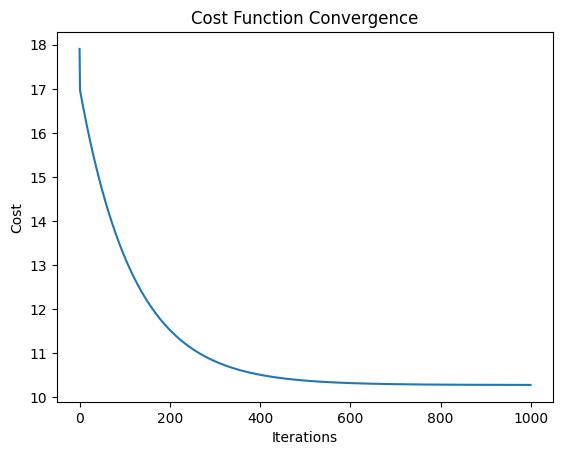

In [ ]:
def main():
    dataset = pd.read_csv('/content/drive/MyDrive/Workshop_5_csv/student.csv')
    X_raw = student_df[['Math', 'Reading']].values
    Y_raw = student_df['Writing'].values
    X = X_raw
    Y = Y_raw
    X_train, X_test, y_train, y_test = spilt_data_train_test(X, Y, test_size=0.3, random_seed=42)
    W = np.zeros(X_train.shape[1])
    alpha = 0.0001
    iterations = 1000
    W_optimal, cost_history = gradient_descent(X_train, y_train, W, alpha, iterations)
    Y_pred_test = np.dot(X_test, W_optimal)
    model_rmse = rmse(y_test, Y_pred_test)
    model_r2 = r2(y_test, Y_pred_test)
    print(f'Final Weights: {W_optimal}\n')
    print(f'Cost History (First 10 iterations): {cost_history[:10]}\n')
    print(f'Cost History (Last 10 iterations): {cost_history[-10:]}')
    print(f'RMSE on Test Set: {model_rmse}\n')
    print(f'R-Squared on Test Set: {model_r2}\n')
    plt.plot(range(iterations), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function Convergence')
    plt.show()
if __name__ == '__main__':
    main()


In [ ]:
def analyze_model_fit(X_train, y_train, X_test, y_test, W, alpha, iterations):
    W_optimal, cost_history = gradient_descent(X_train, y_train, W, alpha, iterations)
    y_train_pred = np.dot(X_train, W_optimal)
    y_test_pred = np.dot(X_test, W_optimal)
    train_rmse = rmse(y_train, y_train_pred)
    test_rmse = rmse(y_test, y_test_pred)
    train_r2 = r2(y_train, y_train_pred)
    test_r2 = r2(y_test, y_test_pred)
    print(f'Training Set:  RMSE = {train_rmse:.4f},  R² = {train_r2:.4f}')
    print(f'Test Set:      RMSE = {test_rmse:.4f},  R² = {test_r2:.4f}')
    print(f'Difference:    RMSE = {abs(test_rmse - train_rmse):.4f},  R² = {abs(train_r2 - test_r2):.4f}')
    return (W_optimal, cost_history, train_rmse, test_rmse, train_r2, test_r2)

def experiment_learning_rates(X_train, y_train, X_test, y_test, learning_rate, iterations=1000):
    results = []
    plt.figure(figsize=(12, 6))
    for alpha in learning_rate:
        W = np.zeros(X_train.shape[1])
        W_optimal, cost_history = gradient_descent(X_train, y_train, W, alpha, iterations)
        y_test_pred = np.dot(X_test, W_optimal)
        test_r2 = r2(y_test, y_test_pred)
        results.append({'alpha': alpha, 'test_r2': test_r2})
        plt.plot(range(iterations), cost_history, label=f'alpha={alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results


Training Set:  RMSE = 4.5334,  R² = 0.9099
Test Set:      RMSE = 4.6973,  R² = 0.9086
Difference:    RMSE = 0.1639,  R² = 0.0014
Train R²: 0.9099, Test R²: 0.9086


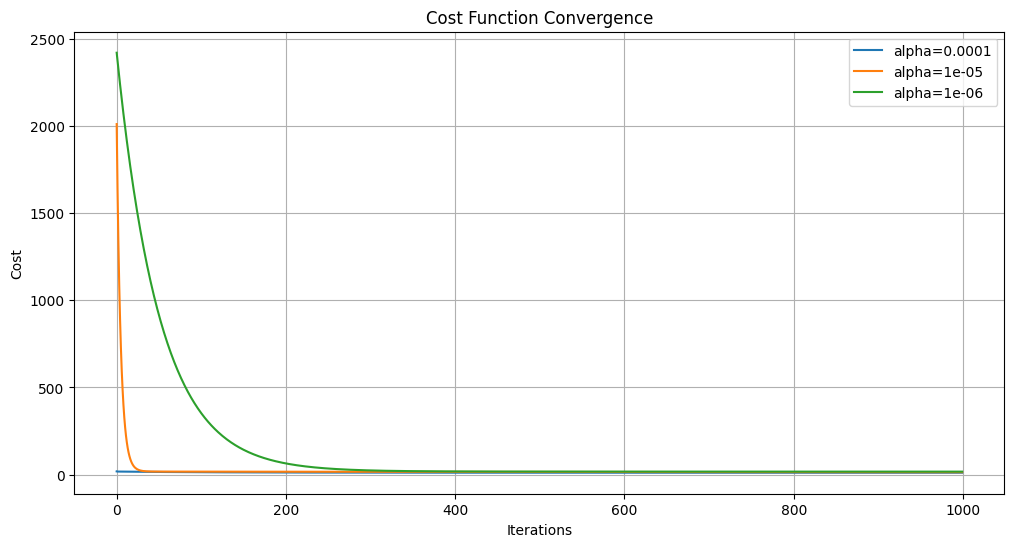


Learning Rate Experiment Results:

Learning Rate: 0.0001, Test R²: 0.9086

Learning Rate: 1e-05, Test R²: 0.8869

Learning Rate: 1e-06, Test R²: 0.8591



In [ ]:
def todo_11():
    X_train, X_test, y_train, y_test = spilt_data_train_test(X, Y, test_size=0.3, random_seed=42)
    W = np.zeros(X_train.shape[1])
    alpha = 0.0001
    iterations = 1000
    W_optimal, cost_history, train_rmse, test_rmse, train_r2, test_r2 = analyze_model_fit(X_train, y_train, X_test, y_test, W, alpha, iterations)
    print(f'Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')
    learning_rates = [0.0001, 1e-05, 1e-06]
    results = experiment_learning_rates(X_train, y_train, X_test, y_test, learning_rates)
    print('\nLearning Rate Experiment Results:\n')
    for result in results:
        print(f"Learning Rate: {result['alpha']}, Test R²: {result['test_r2']:.4f}\n")
if __name__ == '__main__':
    todo_11()
